# Introduction: Ames Housing Regression Price Analysis 

The objective for this data science project is to predict future housing prices in Ames, Iowa. The main question guiding the analysis is seen in the following, `"Which housing features positively affect the predicted sales price?"`
The **success metric** that will be used for this problem is the **root mean squared error (RMSE)**.   
([Link to the project in Kaggle](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/overview) )

# Executive Summary

Our goal is to predict the sale price of houses in Ames, Iowa using regression models. This is in reference to the different features available in the dataset.

The models that will be used for this predictive analysis are `Least Squares`, `Ridge`, `LASSO`. 

Due to the nature of the problem, RMSE is a good indicator of how concentrated the data is around the line of best fit, meaning the lower the RMSE score, the more accurate our predictions of Sale Prices would be.

# Table of Contents

<ul>
<li><a href="#explore">Explore Dataset</a></li>
<li><a href="#EDA">EDA</a></li>
<li><a href="#FE">Feature Engineering</a></li>
<li><a href="#Bencmarks">Establish Benchmarks</a></li>
<li><a href="#Modelling">Modelling</a></li>
<li><a href="#Evaluation">Model Evaluation</a></li>
<li><a href="#Conclusions">Conclusions</a></li>

<a id='explore'></a>
# Explore Dataset

- [Data dictionary for the dataset](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)
- [Detailed text documentation of dataset](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

### Import Dependencies

In [969]:
# Data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300, 'display.max_rows', 300)

# Plotting & Data Visualisation
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Pre-configure Plotting Style 
%config InlineBackend.figure_format = 'retina'
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Modelling
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import VarianceThreshold, RFECV, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Success Metric
from sklearn.metrics import mean_squared_error

### Read In Data

In [970]:
# Read in train data
housing = pd.read_csv('../data/train.csv')

# Make duplicate of train data
train = housing.copy()
 
# Read in test data
test = pd.read_csv('../data/test.csv')

# Display train data
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [971]:
# Set Id's as index since it is being used as identification
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)

<a id='EDA'></a>
# Exploratory Data Analysis

In [972]:
# Check dimensionality of data
train.shape, test.shape

((2051, 80), (879, 79))

In [973]:
# Check if both train & test datasets have the same set of features (except SalePrice)
assert train.columns.values[:-1] in test.columns.values

In [974]:
# Observe data types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

## Examine Data

### Describe for Numerical Columns

In [975]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0
BsmtFin SF 1,2050.0,4.423005e+02,4.612041e+02,0.0,0.0,368.0,7.337500e+02,5644.0


### Convert features that have the wrong data type

In [976]:
# Convert MS SubClass to object type 
train['MS SubClass'] = train['MS SubClass'].astype('str')
test['MS SubClass'] = test['MS SubClass'].astype('str')

### Value Counts for Categorical Columns

In [977]:
# Display categorical column and it's value counts
for col in housing.columns:
    if housing[col].dtype == 'object':
        print('\nColumn Name:', col)
        print(housing[col].value_counts())


Column Name: MS Zoning
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

Column Name: Street
Pave    2044
Grvl       7
Name: Street, dtype: int64

Column Name: Alley
Grvl    85
Pave    55
Name: Alley, dtype: int64

Column Name: Lot Shape
Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

Column Name: Land Contour
Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

Column Name: Utilities
AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

Column Name: Lot Config
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

Column Name: Land Slope
Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

Column Name: Neighborhood
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW 

### Categorise Variables Accordingly

In [978]:
train.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [979]:
nominal_cols = [
    'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
    '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 
    'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 
    'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val', 'Pool Area', 'Fence'
]

ordinal_cols = [
    'Land Contour', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Year Built', 
    'Year Remod/Add', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC',
    'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond',
    'Garage Yr Blt', 'Pool QC', 
]

categorical_cols = [
    'PID', 'MS SubClass', 'MS Zoning',  'Street', 'Alley', 'Condition 1', 'Condition 2', 
    'Lot Shape', 'Lot Config', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Utilities',
    'Electrical', 'Garage Type', 'Paved Drive', 'Sale Type', 'Misc Feature', 'Mo Sold', 'Yr Sold'
]

**Columns have been split accordingly as above so that the way we deal with them later respectively will differ.**

## Identify and Remove Unwanted Features

In [980]:
# Create function to track removed features
def removed_features(features_to_be_removed):
    for feature in features_to_be_removed:
        for col in [nominal_cols, ordinal_cols, categorical_cols]:
            if feature in col:
                col.remove(feature)
                print('Removed: {}'.format(feature))

In [981]:
# Remove PID, Year Built, Garage Cars
remove_features = ['PID', 'Year Built', 'Garage Cars', 'Condition 2', 'Roof Matl']

train.drop(columns=remove_features, inplace=True)
test.drop(columns=remove_features, inplace=True)

removed_features(remove_features)

Removed: PID
Removed: Year Built
Removed: Garage Cars
Removed: Condition 2
Removed: Roof Matl


**- The rationale for removing `PID` is that it does not play any role to the Sale Price and has no specific order to it, since it is just a form of identification.**  
**- `Year Built` is the same as `Year Remod/Add`, and hence, we can use `Year Remod/Add` to determine how year affects the sale price.**  
**- `Garage Cars` has been removed as this is represented through another feature `Garage Area`.**  
**- `Roof Matl` has been removed as this is represented through another feature `Roof Style`.**  
**- `Condition 2` has been removed as this is represented through another feature `Condition 1`.**

In [982]:
# Remove Garage Qual, Exter Qual, Kitchen Qual, Bsmt Qual

remove_features = ['Garage Qual', 'Exter Qual','Kitchen Qual', 'Bsmt Qual']

train.drop(columns=remove_features, inplace=True)
test.drop(columns=remove_features, inplace=True)

removed_features(remove_features)

Removed: Garage Qual
Removed: Exter Qual
Removed: Kitchen Qual
Removed: Bsmt Qual


**`Overall Qual` is a combination of the above four mentioned, hence, `Garage Qual`, `Exter Qual`, `Kitchen Qual`, `Bsmt Qual` have been removed**

In [983]:
# Remove any houses with more than 4,000 square feet from the data set
above_4k = train[train['Gr Liv Area'] > 4000].index

# Drop the 2 rows which has 'Gr Liv Area' > 4000 in X_train
train.drop(above_4k, inplace=True)

**Removed the above as mentioned in the *special notes* section found in [detailed text documentation of dataset](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)**

### Handling Missing Values

In [984]:
# Check for features with null values
train.isnull().sum().sort_values(ascending=False).head(25)

Pool QC           2041
Misc Feature      1985
Alley             1909
Fence             1649
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Foundation           0
Exterior 2nd         0
dtype: int64

In [985]:
# Remove features with high proportion of null values
remove_features = ['Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu']

train.drop(columns=remove_features, inplace=True)
test.drop(columns=remove_features, inplace=True)

removed_features(remove_features)

Removed: Pool QC
Removed: Misc Feature
Removed: Alley
Removed: Fence
Removed: Fireplace Qu


In [986]:
# Make list of rest of columns with 'NA' or 'None' as a category
cols_with_NA = ['Garage Cond', 'Garage Finish','Garage Yr Blt', 'Garage Type', 'Bsmt Exposure', 
                'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond', 'Lot Frontage', 'Mas Vnr Type']

In [987]:
# Replace NaN values in cols_with_NA with 'None' or 0' for train
for col in train[cols_with_NA]:
    if train[col].dtype == 'object':
        train[col].fillna('None', inplace=True)
    else:
        train[col].fillna(0, inplace=True)   
        
# Replace NaN values in cols_with_NA with 'None' or 0' for test
for col in train[cols_with_NA]:
    if test[col].dtype == 'object':
        test[col].fillna('None', inplace=True)
    else:
        test[col].fillna(0, inplace=True)   

In [988]:
# Use sklearn's imputer class to impute values accordingly 
modal_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Implement modal imputer to Mas Vnr Area to fill NA with mode
train['Mas Vnr Area'] = modal_imputer.fit_transform(train[['Mas Vnr Area']]).ravel()
test['Mas Vnr Area'] = modal_imputer.fit_transform(test[['Mas Vnr Area']]).ravel()

In [989]:
# Check for existing null values
train.isnull().sum().sort_values(ascending=False).head()

Bsmt Full Bath    2
Bsmt Half Bath    2
Total Bsmt SF     1
Garage Area       1
Bsmt Unf SF       1
dtype: int64

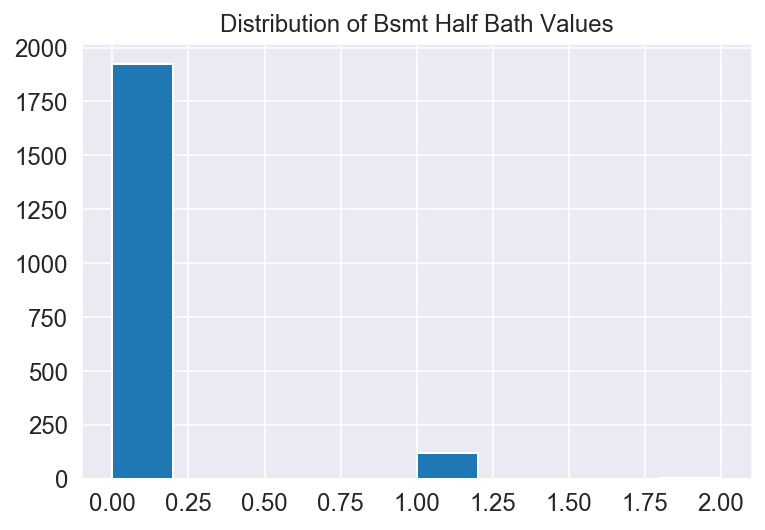

In [990]:
# Explore collinearity
train['Bsmt Half Bath'].hist();
plt.title('Distribution of Bsmt Half Bath Values');

In [991]:
remove_features = ['Bsmt Half Bath', 'Bsmt Full Bath']

train.drop(columns=remove_features, inplace=True)
test.drop(columns=remove_features, inplace=True)

removed_features(remove_features)

Removed: Bsmt Half Bath
Removed: Bsmt Full Bath


**Upon further inspection, we can see there is low variability in this feature, hence we will drop it, along with it 'Bsmt Full Bath' which also has low variability.**

In [992]:
# Check for existing nulls
train.isnull().sum().sort_values().tail()

BsmtFin SF 2     1
Bsmt Unf SF      1
BsmtFin SF 1     1
Garage Area      1
Total Bsmt SF    1
dtype: int64

In [993]:
train.drop(1342, axis=0, inplace=True)

In [994]:
# Use sklearn's imputer class to impute values accordingly 
modal_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Implement modal imputer to Garage Area to fill NA with median
train['Garage Area'] = modal_imputer.fit_transform(train[['Garage Area']]).ravel()
test['Garage Area'] = modal_imputer.fit_transform(test[['Garage Area']]).ravel()

**Basement null values will be dealt with later in section 6.**

### Explore Multicollinearity

In [995]:
# Check for existing nulls
train.isnull().sum().sort_values().tail()

BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Sale Type         0
SalePrice         0
dtype: int64

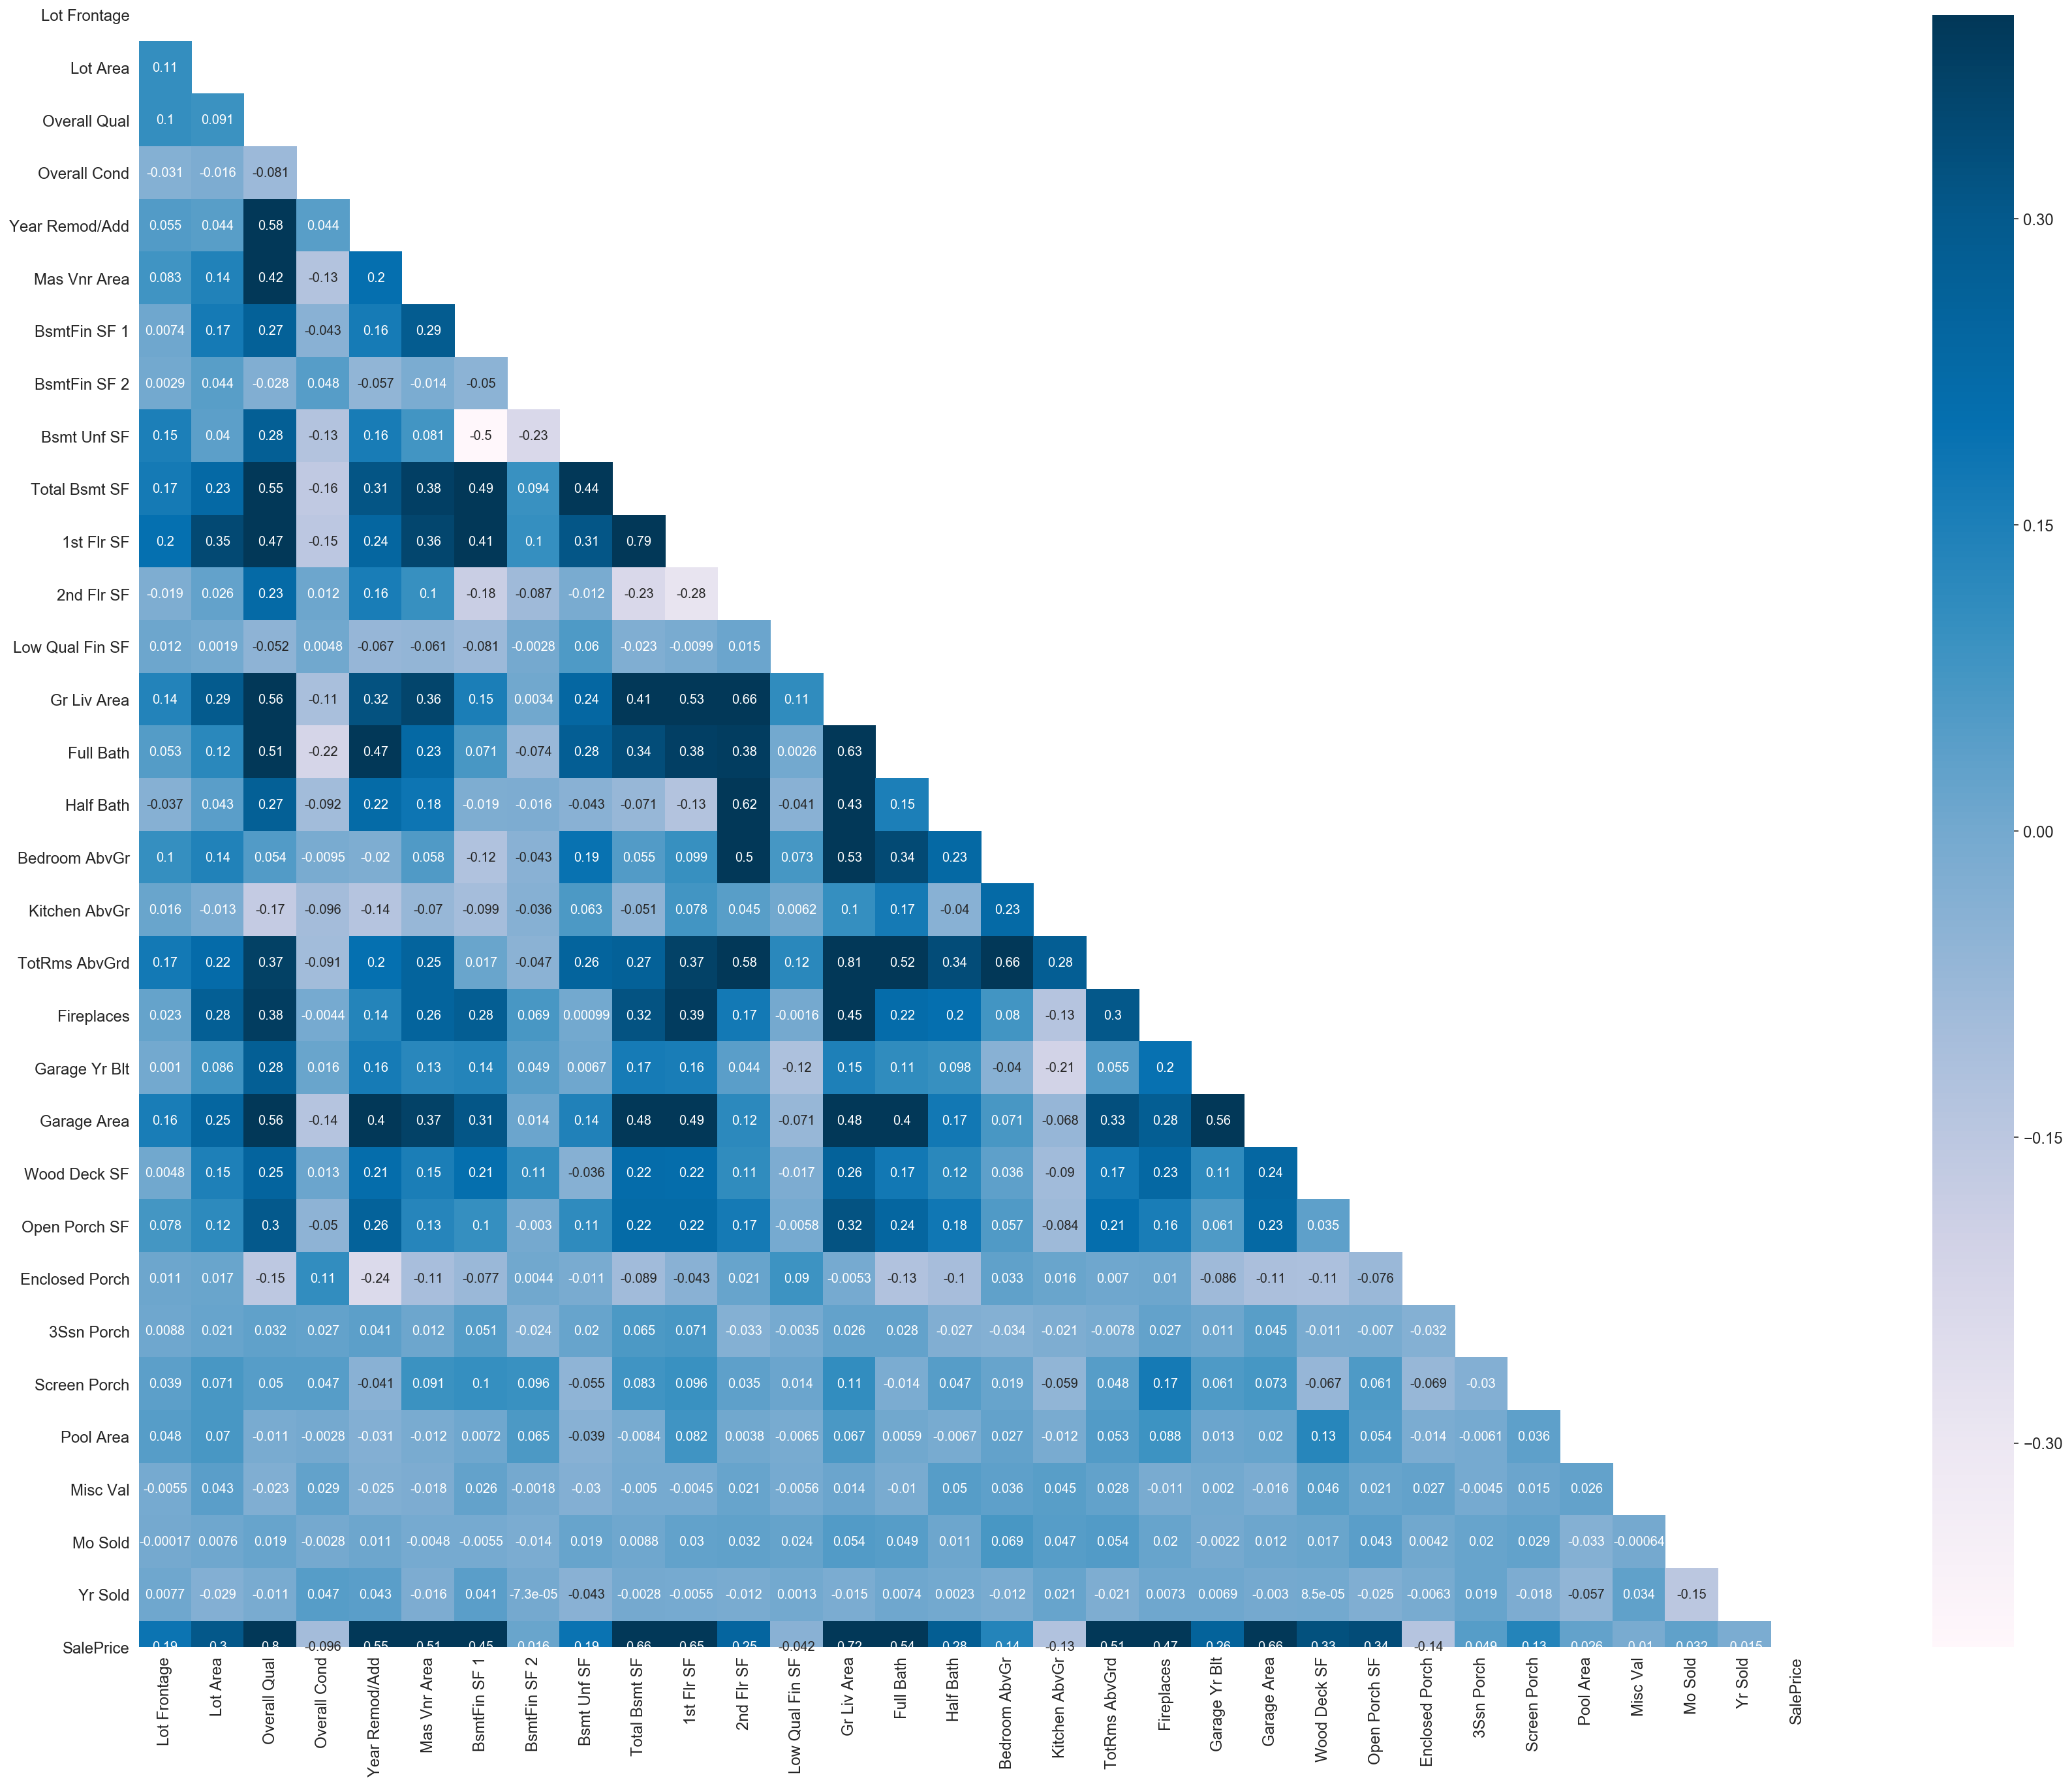

In [996]:
# Explore multicollinearity between features
corr = train.corr()

# Establish size of figure.
plt.figure(figsize=(30,23))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, vmin=-.4,vmax=.4, square=True, annot=True, cmap='PuBu')

In [997]:
# Remove features with multicollinearity
remove_features = ['Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Bedroom AbvGr', 'Bsmt Exposure']

train.drop(columns=remove_features, inplace=True)
test.drop(columns=remove_features, inplace=True)

removed_features(remove_features)

Removed: Full Bath
Removed: Half Bath
Removed: TotRms AbvGrd
Removed: Bedroom AbvGr
Removed: Bsmt Exposure


**Removed above features due to multicollinearity, having more than one +-.4 correlation with other features, as well as obvious ones like Bsmt Exposure (there are more than 10 features that is related to Basement), we will continue monitor this feature that will definitely have multicollinearity.**

## Summary of EDA & Dropped Features

Although Section 5 was meant for a quick EDA, it was best to remove features that were easy to determine as unwanted or insignificant as mentioned in respective cells so as to aid ease of workflow moving forward, since there will certainly be more features that we will be removing as we delve deeper into the data. Below is a summary of features that have been removed:

`Land Slope`,
`Full Bath`,
`Half Bath`,
`TotRms AbvGrd`,
`Bsmt Full Bath`,
`Bedroom AbvGr`,
`PID`,
`Year Built`,
`Garage Cars`,
`Garage Qual`,
`Exter Qual`,
`Kitchen Qual`,
`Bsmt Qual`,
`Pool QC`,
`Misc Feature`,
`Alley`,
`Fence`,
`Fireplace Qu`,
`Bsmt Half Bath`,
`Bsmt Exposure`

*(Summarised based on efforts below as well)*

<a id='FE'></a>
# Feature Engineering & Futher Data Cleaning 

## Ordinal Encoding

In [998]:
# Create function that encodes quality variables according to a quality dictionary
def qualitize(feature, df):
    '''
    Input is a feature, passed as a string
    Output is the input dataframe with the feature encoded as follows:
    'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1
    '''
    # Quality dictionary
    quality = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    # Recode the variable into a new variable
    df[feature] = df[feature].map(quality)
    # Fill NaNs as 0
    df[feature].fillna(value=0, inplace = True)

In [999]:
# Use the "qualitize" function on features with order from Poor to Excellent
cols = ['Exter Cond', 'Bsmt Cond','Heating QC', 'Garage Cond']

# Apply to train
for col in cols:
    qualitize(col, train)
    
# Apply to test 
for col in cols:
    qualitize(col, test)

In [1000]:
train['BsmtFin Type 2'].value_counts()

Unf     1747
Rec       80
LwQ       60
None      55
BLQ       48
ALQ       35
GLQ       23
Name: BsmtFin Type 2, dtype: int64

In [1001]:
# Manually "qualitize" features based on data dictionary

# BsmtFin Type 1
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1})
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1})
train['BsmtFin Type 1'].fillna(value=0, inplace = True)
test['BsmtFin Type 1'].fillna(value=0, inplace = True)

# BsmtFin Type 2
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map({'GLQ':6, 'ALQ':5,'BLQ':4, 'Rec':3, 'LwQ':2,' Unf':1})
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].map({'GLQ':6, 'ALQ':5,'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1})
train['BsmtFin Type 2'].fillna(value=0, inplace = True)
test['BsmtFin Type 2'].fillna(value=0, inplace = True)

# Electrical
train['Electrical'] = train['Electrical'].map({'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1})
test['Electrical'] = test['Electrical'].map({'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1})
test['Electrical'].fillna(value=0, inplace = True)

# Garage Finish
train['Garage Finish'] = train['Garage Finish'].map({'Fin':3,'RFin':2,'Unf':1})
test['Garage Finish'] = test['Garage Finish'].map({'Fin':3,'RFin':2,'Unf':1})
train['Garage Finish'].fillna(value=0, inplace = True)
test['Garage Finish'].fillna(value=0, inplace = True)

# Land Slope
train['Land Slope'] = train['Land Slope'].map({'Gtl ':3,'Mod':2,'Sev':1})
test['Land Slope'] = test['Land Slope'].map({'Gtl ':3,'Mod':2,'Sev':1})

## Binary Encoding

In [1002]:
# Binary encode for the follow categorical features that have no clear semblance of order 

# Lot Shape
train['Lot Shape'] = train['Lot Shape'].apply(lambda x: 1 if x == 'Reg' else 0)
test['Lot Shape'] = test['Lot Shape'].apply(lambda x: 1 if x == 'Reg' else 0)

# Land Contour
train['Land Contour'] = train['Land Contour'].apply(lambda x: 1 if x == 'Lvl' else 0)
test['Land Contour'] = test['Land Contour'].apply(lambda x: 1 if x == 'Lvl' else 0)

# Lot Config
train['Lot Config'] = train['Lot Config'].apply(lambda x: 1 if x == 'Inside' else 0)
test['Lot Config'] = test['Lot Config'].apply(lambda x: 1 if x == 'Inside' else 0)

# House Style
train['House Style'] = train['House Style'].apply(lambda x: 1 if x == '1Story' else 0)
test['House Style'] = test['House Style'].apply(lambda x: 1 if x == '1Story' else 0)

# Central Air
train['Central Air'] = train['Central Air'].apply(lambda x: 1 if x == 'Y' else 0)
test['Central Air'] = test['Central Air'].apply(lambda x: 1 if x == 'Y' else 0)

# Functional
train['Functional'] = train['Functional'].apply(lambda x: 1 if x == 'Typ' else 0)
test['Functional'] = test['Functional'].apply(lambda x: 1 if x == 'Typ' else 0)

# Street
train['Street'] = train['Street'].apply(lambda x: 1 if x == 'Pave' else 0)
test['Street'] = test['Street'].apply(lambda x: 1 if x == 'Pave' else 0)

# Paved Drive
train['Paved Drive'] = train['Paved Drive'].apply(lambda x: 0 if x == 'N' else 1)
test['Paved Drive'] = test['Paved Drive'].apply(lambda x: 0 if x == 'N' else 1)

## Adding/Dropping Features

In [1003]:
# Combine basement size related features to one
train['Basement SF'] = train['BsmtFin SF 1'] +  train['BsmtFin SF 2'] + train['Bsmt Unf SF'] + train['Total Bsmt SF']
test['Basement SF'] = test['BsmtFin SF 1'] +  test['BsmtFin SF 2'] + test['Bsmt Unf SF'] + test['Total Bsmt SF']

# Remove fatures
remove_features = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']

# Drop basement_SF columns  
train.drop(columns=remove_features, inplace=True)
test.drop(columns=remove_features, inplace=True)

removed_features(remove_features)

Removed: BsmtFin SF 1
Removed: BsmtFin SF 2
Removed: Bsmt Unf SF
Removed: Total Bsmt SF


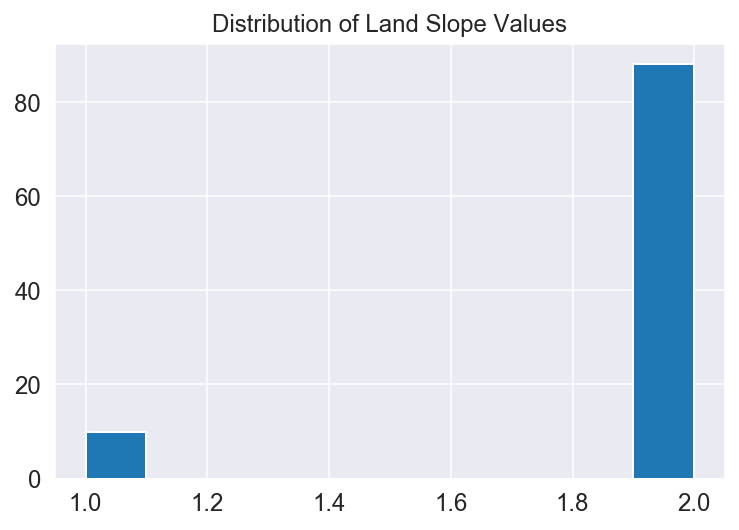

In [1004]:
# Explore collinearity
train['Land Slope'].hist();
plt.title('Distribution of Land Slope Values');

In [1005]:
remove_features = ['Land Slope']

train.drop(columns=remove_features, inplace=True)
test.drop(columns=remove_features, inplace=True)

removed_features(remove_features)

Removed: Land Slope


## One Hot Encoding

In [1006]:
train[categorical_cols].head(3)

,MS SubClass,MS Zoning,Street,Condition 1,Lot Shape,Lot Config,Neighborhood,Bldg Type,House Style,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Utilities,Electrical,Garage Type,Paved Drive,Sale Type,Mo Sold,Yr Sold
Id,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,1,RRAe,0,0,Sawyer,1Fam,0,Gable,HdBoard,Plywood,BrkFace,CBlock,GasA,1,AllPub,5,Attchd,1,WD,3,2010
544,60,RL,1,Norm,0,0,SawyerW,1Fam,0,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,1,AllPub,5,Attchd,1,WD,4,2009
153,20,RL,1,Norm,1,1,NAmes,1Fam,1,Gable,VinylSd,VinylSd,None,CBlock,GasA,1,AllPub,5,Detchd,1,WD,1,2010


**As segregated earlier above, we now have to find a way for the machine to be able to do calculations with the  categorical data that still have strings as values.**

In [1007]:
one_hot_cols = [
                'MS SubClass',
                'MS Zoning',
                'Neighborhood',
                'Condition 1',
                'Bldg Type',
                'Roof Style',
                'Exterior 1st',
                'Exterior 2nd',
                'Mas Vnr Type',
                'Foundation',
                'Heating',
                'Utilities',
                'Garage Type',
                'Sale Type'
                ] 

In [1008]:
# One hot encode data in categorical columns for both train & test data set
train = pd.get_dummies(train, columns=one_hot_cols, drop_first = True, dtype=int)
test = pd.get_dummies(test, columns=one_hot_cols, drop_first = True, dtype=int)

In [1009]:
train.head()

,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,House Style,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,Exter Cond,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Kitchen AbvGr,Functional,Fireplaces,Garage Yr Blt,Garage Finish,Garage Area,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Basement SF,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Utilities_NoSeWa,Utilities_NoSewr,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,0.0,13517,1,0,1,0,0,6,8,2005,289.0,3,3.0,6.0,0.0,5,1,5,725,754,0,1479,1,1,0,1976.0,0.0,475.0,3.0,1,0,44,0,0,0,0,0,3,2010,130500,1450.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
544,43.0,11492,1,0,1,0,0,7,5,1997,132.0,3,3.0,6.0,0.0,5,1,5,913,1209,0,2122,1,1,1,1997.0,0.0,559.0,3.0,1,0,74,0,0,0,0,0,4,2009,220000,1826.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
153,68.0,7922,1,1,1,1,1,5,7,2007,0.0,4,3.0,6.0,0.0,3,1,5,1057,0,0,1057,1,1,0,1953.0,1.0,246.0,3.0,1,0,52,0,0,0,0,0,1,2010,109000,2114.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3

In [1010]:
train.shape, test.shape

((2048, 162), (879, 156))

## Variance Thresholding

In [1011]:
# Create variance threshold function & return back only features that meet threshold
def variance_threshold_selector(data, threshold=.45):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]].columns.to_list()

In [1012]:
# Apply variance threshold function to ohe_features
features_selected = variance_threshold_selector(train)
features_selected

['Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Area',
 'Garage Cond',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'Basement SF']

**One hot encoded features with higher variance selected for modelling:
`'MS SubClass_20'`,
`'Exterior 1st_VinylSd'`,
`'Exterior 2nd_VinylSd'`,
`'Mas Vnr Type_BrkFace'`,
`'Mas Vnr Type_None'`,
`'Foundation_CBlock'`,
`'Foundation_PConc'`,
`'Garage Type_Attchd'`**

## Summary of Feature Engineering

- **6.1 Ordinal Encoding:**  
`Fireplace Qu`, `Exter Cond`, `Bsmt Cond`,`Heating QC`, `Garage Cond`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Electrical`, `Garage Finish`, `Land Slope`(removed) 


- **6.2 Binary Encoding:**  
`Lot Shape`, `Land Contour`,`Lot Config`,`House Style`,`Central Air`,`Functional`,`Street`,`Paved Drive`
  
  
- **6.3a Removed Features:**  
`BsmtFin SF 1`, `BsmtFin SF 2`, `Bsmt Unf SF`, `Total Bsmt SF`, `Land Slope` 


- **6.3b Added Features:**   
`Basement SF` (Combined the following: `BsmtFin SF 1`, `BsmtFin SF 2`, `Bsmt Unf SF`, `Total Bsmt SF`
  
  
- **6.4 One Hot Encoding:**  
`MS SubClass`, `MS Zoning`, `Neighborhood`,`Condition 1`, `Bldg Type`,`Roof Style`,`Exterior 1st`,
`Exterior 2nd`, `Mas Vnr Type`,`Foundation`,`Heating`,`Utilities`,`Garage Type`,`Sale Type`
   
   
- **6.5 After Variance Thresholding, Kept Following Features:**  
`'MS SubClass_20'`,
`'Exterior 1st_VinylSd'`,
`'Exterior 2nd_VinylSd'`,
`'Mas Vnr Type_BrkFace'`,
`'Mas Vnr Type_None'`,
`'Foundation_CBlock'`,
`'Foundation_PConc'`,
`'Garage Type_Attchd'`

<a id='Benchmarks'></a>
# Establish Benchmarks

In [1013]:
baseline = train['SalePrice'].mean()
print('Baseline RMSE score for regression(average y value, "SalePrice"): \nUSD', round(baseline))

Baseline RMSE score for regression(average y value, "SalePrice"): 
USD 181529


In [1014]:
scoring_metric = 'neg_mean_squared_error'
target = 'SalePrice'

<a id='Modelling'></a>
# Modelling

### Set up X and y

In [1015]:
# Remove SalePrice from features selected
features_selected.remove('SalePrice')

In [1016]:
X = train[features_selected]
y = train['SalePrice']
X_final = test[features_selected]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.2,
                                                    random_state=42)

## Compare Model Scores

In [1017]:
# Selected linear models:
lr    = LinearRegression(normalize=False, n_jobs=1)
lasso = Lasso(alpha=1.0, max_iter=1200, normalize=False) # L1 Norm
ridge = Ridge(alpha=1.0, max_iter=1200, normalize=False) # L2 Norm

In [1018]:
# Scale and normalise data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)

In [1019]:
# Compare models' scores to determine best pick
lr_score = cross_val_score(lr, X_train_sc ,y_train, cv=5).mean()
print('Linear Regression Score: {}'.format(lr_score))
lasso_score = cross_val_score(lasso, X_train_sc ,y_train, cv=5).mean()
print('LASSO Regression Score: {}'.format(lasso_score))
ridge_score = cross_val_score(ridge, X_train_sc ,y_train, cv=5).mean()
print('Ridge Regression Score: {}'.format(ridge_score))

Linear Regression Score: 0.8496507375770278
LASSO Regression Score: 0.8496066908473697
Ridge Regression Score: 0.8496265526106788


/Users/jeromechua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1532378660.4641113, tolerance: 804430850.3846542
  positive)
/Users/jeromechua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1834918129.4367676, tolerance: 852524875.263105
  positive)
/Users/jeromechua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1865192433.779663, tolerance: 817483140.7854162
  positive)
/Users/jeromechua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might wan

In [1020]:
# Compare Model RMSE Scores
lr_score = -cross_val_score(lr, X_train_sc, y_train, cv=10, scoring='neg_mean_squared_error')
lasso_score = -cross_val_score(lasso, X_train_sc, y_train, cv=10, scoring='neg_mean_squared_error')
ridge_score = -cross_val_score(ridge, X_train_sc, y_train, cv=10, scoring='neg_mean_squared_error')

print('Linear Regression RMSE Score: {}'.format(np.sqrt(lr_score.mean())))
print('Linear Regression RMSE Std Dev.: {}'.format(np.std(np.sqrt(lr_score))))
print('LASSO Regression RMSE Score: {}'.format(np.sqrt(lasso_score.mean())))
print('LASSO Regression RMSE Std Dev.: {}'.format(np.std(np.sqrt(lasso_score))))
print('Ridge Regression RMSE Score: {}'.format(np.sqrt(ridge_score.mean())))
print('Ridge Regression RMSE Std Dev.: {}'.format(np.std(np.sqrt(ridge_score))))

/Users/jeromechua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1396772451.4108887, tolerance: 903451117.6149691
  positive)
/Users/jeromechua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1638881119.5390625, tolerance: 947116881.5309485
  positive)
/Users/jeromechua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1702783678.390625, tolerance: 951773779.4180754
  positive)
/Users/jeromechua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might wa

Linear Regression RMSE Score: 30679.56646782446
Linear Regression RMSE Std Dev.: 3517.799360941092
LASSO Regression RMSE Score: 30677.15273163938
LASSO Regression RMSE Std Dev.: 3518.516303744117
Ridge Regression RMSE Score: 30676.051990000757
Ridge Regression RMSE Std Dev.: 3518.2097254265473


/Users/jeromechua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1640133273.0800781, tolerance: 909851455.8412886
  positive)
/Users/jeromechua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1472847652.4333496, tolerance: 965301504.3554747
  positive)
/Users/jeromechua/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265316870.761963, tolerance: 960763247.0760782
  positive)


**Since the Ridge model performs the best with a lowest RMSE score of 30,676 USD, we will be using it for the rest of the modelling process** 

## Model 1 - Ridge Regression

### To Train Data

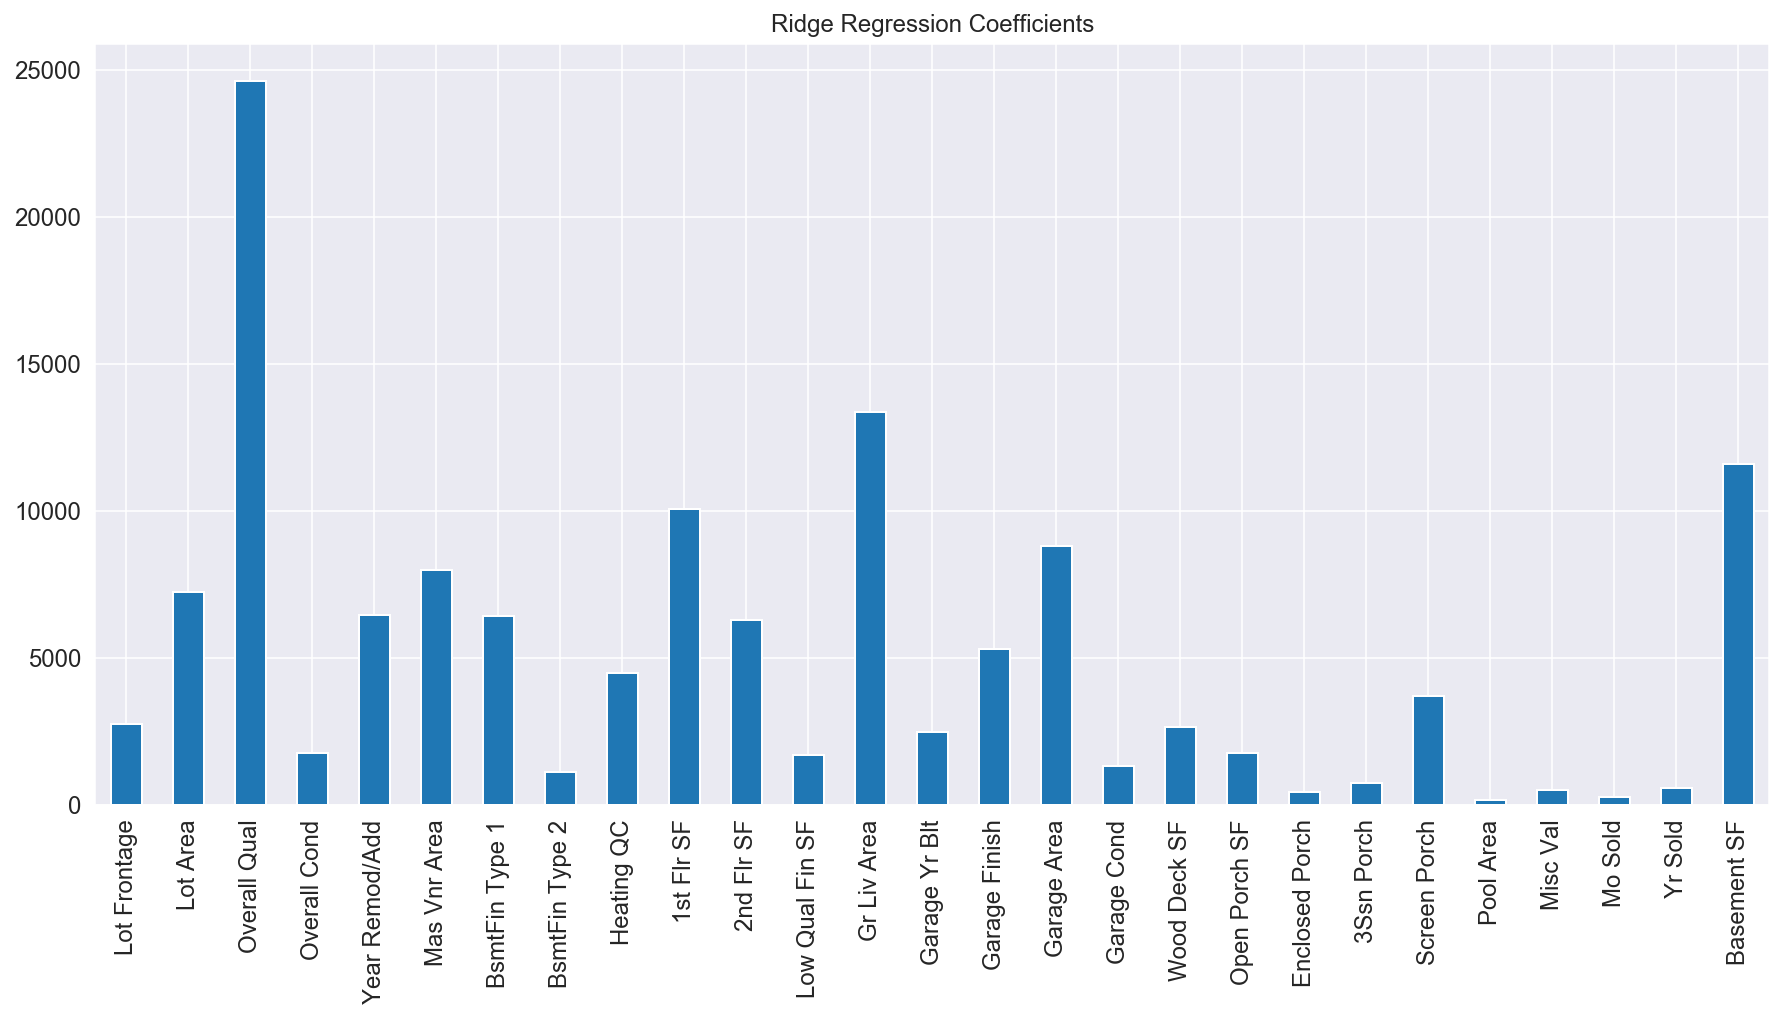

In [1021]:
# Scale and normalise data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)

# Fit Ridge model to train data
ridge.fit(X_train_sc, y_train)

# Plot Ridge coefficients' weight 
pd.Series(abs(ridge.coef_), index=X.columns).plot.bar(figsize=(15, 7));
plt.title('Ridge Regression Coefficients');

### To Test Data

In [1022]:
# Scale and normalise data
ss = StandardScaler()
X_final_sc = ss.fit_transform(X_final)

# Fit Ridge model to train data
ridge.fit(X_train_sc, y_train)

# Predict scores for Test SalePrice data
predict = ridge.predict(X_final_sc) 

In [1023]:
test['SalePrice'] = predict
#test.to_csv('kaggle.csv',index=False)

## Model 2 - Ridge Regression with Polynomial Features, followed by RFECV

### Apply Polynomial Features to Train data

In [1024]:
# Generate polynomial features for training set with interaction_only set to True
poly = PolynomialFeatures(degree=2, interaction_only = True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_sc)
poly_train = pd.DataFrame(X_train_poly, 
                          columns=poly.get_feature_names(X_train.columns),
                          index=X_train.index)

print('Number of total features generated after applying PolynomialFeatures: {}'.format(poly_train.shape[1]))

Number of total features generated after applying PolynomialFeatures: 378


### Apply RFECV (Feature Elimination) to Train Data for Final Features Selection

In [1025]:
# Instantiate RFECV object(for feature elimnation) 
rfecv = RFECV(estimator=ridge, 
              step=5, 
              min_features_to_select=5, 
              cv=10, 
              scoring=scoring_metric)

# Apply feature elimnation to poly_train
rfecv.fit(X_train_poly, y_train)

print('Optimal number of features (after applying RFECV): {}'.format(rfecv.n_features_))

Optimal number of features (after applying RFECV): 33


In [1026]:
# Create dataframe for RFECV features
rfecv_df = pd.DataFrame(data=rfecv.ranking_.reshape(-1,1), 
                        index=poly_train.columns, 
                        columns=['Rank'])

# Create list of selected features that have the highest rank (rank equals 1)
final_features = rfecv_df[rfecv_df['Rank'] == 1].index.tolist()

In [1027]:
print('Total Number of Features Selected for Model 2: {}'.format(len(final_features)))

Total Number of Features Selected for Model 2: 33


### Apply Polynomial Features to Test data 

In [1028]:
# Instantiate PolynomialFeatures object with interaction_only set to True
poly = PolynomialFeatures(degree=2, 
                          interaction_only = True, 
                          include_bias=True)

# Generate polynomial features for scaled test set
X_final_poly = poly.fit_transform(X_final_sc) 

# Create Dataframe so as to be able to filter for selected features seen in next cell
poly_final = pd.DataFrame(X_final_poly, 
                          columns=poly.get_feature_names(X_final.columns),
                          index=X_final.index)

### Filter For Selected Final Features where RFECV has been applied (as seen in *8.3.2*)

In [1029]:
# Display and check features selected from RFECV to test set
X_test = poly_final[final_features]
X_train = poly_train[final_features]

In [1030]:
# Fit Ridge model to train data
ridge.fit(X_train, y_train)

# Predict scores for Test SalePrice data
predict = ridge.predict(X_test)

In [1035]:
print('RMSE Derived from Ridge Regression on Training Set: {}'.format(np.sqrt(abs(cross_val_score(ridge, X_train, y_train, cv=10, scoring=scoring_metric)).mean())))

RMSE Derived from Ridge Regression on Training Set: 24467.867177833476


Strength of relationship between Target and Predictors: 0.91


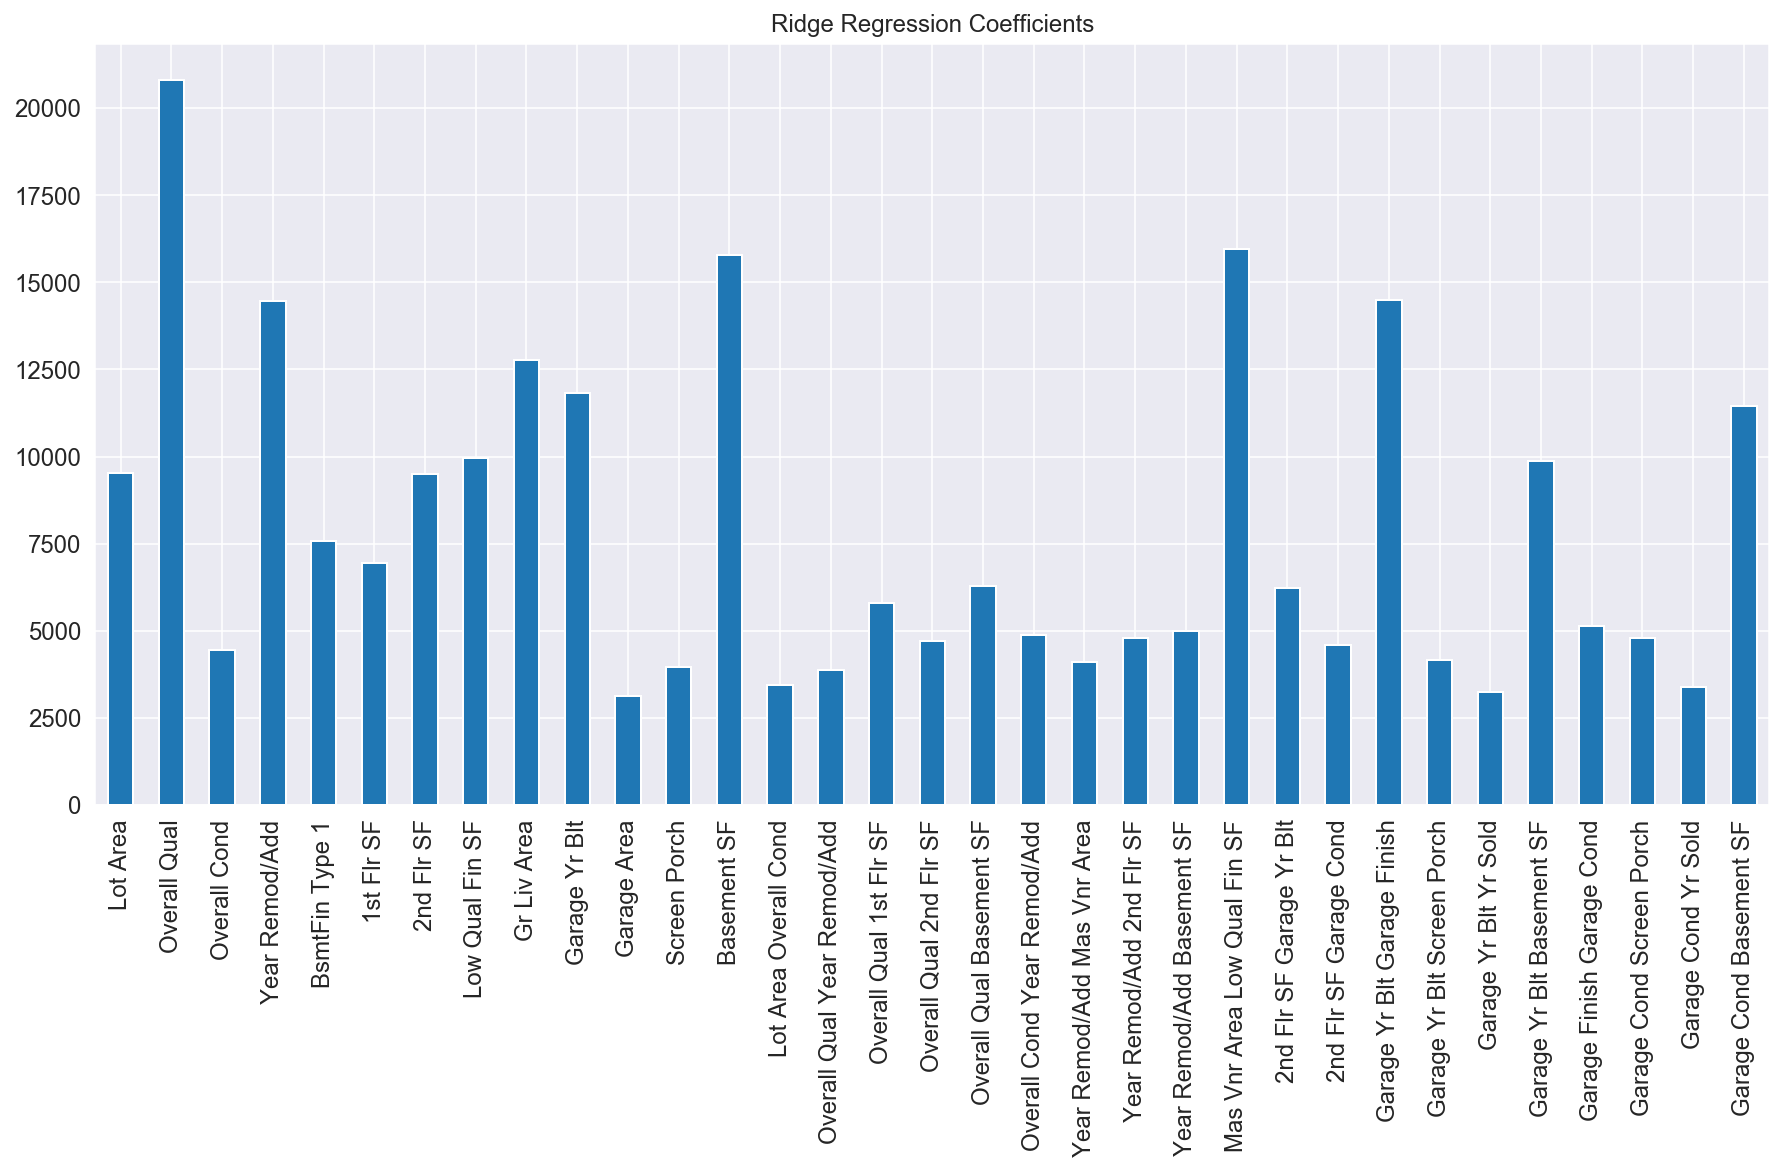

In [1032]:
print('Strength of relationship between Target and Predictors: {}'.format(round(ridge.score(X_train, y_train),2)))

# Plot Ridge coefficients' weight 
pd.Series(abs(ridge.coef_), index=X_train.columns).plot.bar(figsize=(15, 7));
plt.title('Ridge Regression Coefficients');

In [1033]:
# Predict scores from new model
X_test['SalePrice'] = predict
#X_test.to_csv('kaggle2.csv',index=False)

/Users/jeromechua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<a id='Evaluation'></a>
# Model Evaluation

## Model 1 - Kaggle Scores:
**Private Score:** 34,654 USD  
**Public Score:** 33,423 USD

## Model 2 - Kaggle Scores:
**Private Score:** 34,584 USD  
**Public Score:**  25,271 USD

## Summary of results:

- **Selected model:** Ridge
- **Selected features:** 33  
- **Training result:** RMSE: 24,467 USD
- **Testing result from Kaggle:** RMSE: 25,271 USD

<a id='Conclusions'></a>
# Conclusions

- **Insights**:
    - Comparing the 3 different linear regression models: `Least Squares`, `Ridge`, and `LASSO` we can see that `Ridge` produced the best scores on a whole when looking at both RMSE and it's standard deviation. `Ridge` was then selected to be applied and tested with 2 variations

    - The selected model, was firstly applied to the selected features which were selected with a variance threshold of 0.45 which producted a score of 33,423 USD
    
    - The selected model was then varied with further generated polynomial features, which produced a total of 378 features. Feature elimination was then applied via `RFECV`. Features were reduced to 33 final features for the varied model. This produced a RMSE score of 25,271 USD
    
    - The features we can conclude that have the strongest relationship to Sale Prices are the following:
        - Lot Area
        - Overall Quality
        - Year Remodification
        - Total Basement Surface Area
        - Prsence of a Masonary Area
        - Garage Finish & Year Built

           
- **Limitations**:
    - The model chosen `Ridge` regression trades variance for bias, meaning that the output from ridge regression is not unbiased. Hence, the scores could have been affected if the features had lower colinearity
    - Other limitations would have been that the way features were engineered at the start would have changed the outcome in numerous ways. Hence, it is always good to have the end in mind  
    
    
- **Notes**:
    - Explore Target Encoding for less hassle in the feature engineering phase
    - Perform GridSearchCV on different models for better comparison betweeen model's hyperparameter variations
    - Create a framework so that the workflow would be smoother
        